## PyTorch: Linear and Logistic Regression Models

Source: https://medium.com/biaslyai/pytorch-linear-and-logistic-regression-models-5c5f0da2cb9


In the second part of the HaWT Python Workshop.  This python notebook includes a brief summary and codes of the topics.  Please refer to the source for more detailed description.

As the objective of this session is to build regression model using artificial neural network, we will not go over the concept of regression assuming that the audience has knowledge of regression analysis. 


## Outline
* Regression Model
* Steps to build Regression Model


## Regression Model

In some data (Y and X), we hope to find a model (equation) that describes a linear relationship between Y and X, so we can make a prediction (or estimation).    

### Simpel Linear Regression
\begin{align}
\hat{x} & = \beta X + a + e \\
\end{align}

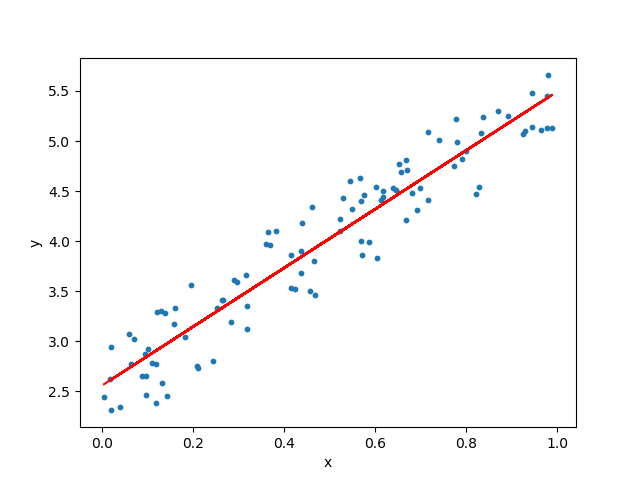



## Define Model Structure

### 1. Import libraries

In [2]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F

### 2. Create X and Y data
In practice, you will upload your own dataset and assign columns of your data to X and Y variables.  For this session, we will just create a data.

PyTorch Basic https://medium.com/biaslyai/learn-pytorch-basics-6d433f186b7a

In [4]:

x_data = Variable(torch.Tensor([[10.0], [9.0], [3.0], [2.0]]))
y_data = Variable(torch.Tensor([[90.0], [80.0], [50.0], [30.0]]))

### 3. Define Model Type
We are interested in building linear regression using our data X and Y. 


In [6]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  #torch.nn.linear(input size, and output size)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearRegression()

### 4. Loss Function (Criterion) and Optimizer
Loss function and optimizer will help find the best fit. We will use MSE (Mean squared error)

In [11]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # optimize my model's parameters using learning rate of 0.01

## Model Training

Until this point, we defined all the components of the model.  
* type of regression analysis?  Linear regression with 1 output (1Y column), 1 input (1 X column)
* what are the data?  we created our own data x_data and y_data
* loss function?  we will use MSE
* optimization? we will use SGD to solve MSE

Our model is now ready to train. We begin by setting up an epoch size. Epoch is a single pass through whole training dataset. In the example below, the epoch size is set to 20, meaning there will be 20 single passes of the training and weight updates.  (provide reference for gradient descent optimization) (epoch)

https://medium.com/biaslyai/pytorch-introduction-to-neural-network-feedforward-neural-network-model-e7231cff47cb

After the forward pass and the loss computation is done, we do a backward pass, which refers to the process of learning and updating the weights. We first need to set our gradient to zero: optimizer.zero_grad() . This is because every time a variable is back propagated through, the gradient will be accumulated instead of being replaced. Then we run a backward pass by loss.backward() . Then optimizer.step() performs a parameter update based on the current gradient.



In [12]:
for epoch in range(20):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_data)
    # Compute Loss
    loss = criterion(y_pred, y_data)
    # Backward pass
    loss.backward()
    optimizer.step()

## Make Predictions
Now that our model is trained, we can simply make a new prediction by inputting a new x value to our model:

In [13]:
new_x = Variable(torch.Tensor([[4.0]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred.data[0][0])

predicted Y value:  tensor(-9.3867e+10)


## Print Model Results

# Logistic Regression

In linear regression problem, we predict Y that can be any numerical value. In logistic regression, Y is a binary value (0, 1), (true or false) (Yes or no), etc.

We will follow exactly same step as Linear Regression, only differences are:
* **Model**: LogisticRegression instead of LinearRegression
* **Loss** function: use BCE instead of MSE 

In [15]:
class LogisticRegression(torch.nn.Module):
     def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
     def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegression()
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # optimize my model's parameters using learning rate of 0.01
